# Shortest route on a Binary matrix
## Stack approach

In [189]:
# Libraries import section
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [190]:
# Now we create the Stack Class to hold the route
class RouteStack:
    def __init__(self):
        self.stack = []

    def add_point(self, point):
        print("+Adding point to the route", point)
        self.stack.append(point)

    def remove_last_point(self):
        print("-Removing the last point", self.stack.pop())
        if len(self.stack) > 0:
            return self.stack[-1]

    def print_route(self):
        print("The route found was", self.stack)

    def find_point(self, point):
        return self.stack.index(point) < 0

    def count_elements(self):
        return len(self.stack)

Now we add the function that is going to perform the route search using BackTracking

+Adding point to the route [0, 0]
Moving to (0, 1)
+Adding point to the route (0, 1)
Moving to (0, 2)
+Adding point to the route (0, 2)
Moving to (0, 3)
+Adding point to the route (0, 3)
-Removing the last point (0, 3)
Moving to (1, 2)
+Adding point to the route (1, 2)
-Removing the last point (1, 2)
-Removing the last point (0, 2)
-Removing the last point (0, 1)
Moving to (1, 0)
+Adding point to the route (1, 0)
Moving to (2, 0)
+Adding point to the route (2, 0)
Moving to (2, 1)
+Adding point to the route (2, 1)
Moving to (3, 1)
+Adding point to the route (3, 1)
Moving to (3, 2)
+Adding point to the route (3, 2)
Moving to (3, 3)
+Adding point to the route (3, 3)
Moving to (2, 3)
+Adding point to the route (2, 3)
-Removing the last point (2, 3)
Moving to (3, 4)
+Adding point to the route (3, 4)
Moving to (3, 5)
+Adding point to the route (3, 5)
Moving to (2, 5)
+Adding point to the route (2, 5)
Moving to (2, 6)
+Adding point to the route (2, 6)
Moving to (1, 6)
+Adding point to the rou

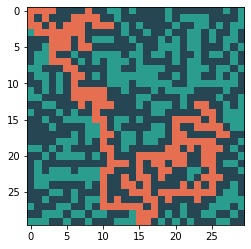

In [191]:
# This is the stack that we will use to manage the Route
route = RouteStack()

def print_matrix(matrix):
    colors = ("white", "red", "blue")
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'custom_col',
        [
            (0, "#2A9D8F"),
            (0.5, "#264653"),
            (1, "#E76F51")
        ],
        N=3
    )
    plt.imshow(matrix, cmap=cmap)
    plt.show()

# Let's create a function that generates random Binary Matrix
def generate_random_binary_matrix (n, m):
    arr = np.random.randint(2, size=(n,m))
    print("The matrix that will be used is:\n")
    print_matrix(arr)
    return arr

def check_limits(matrix: np.ndarray, point):
    if point[0] < 0 or point[1] < 0:
        return False
    rows = len(matrix)
    cols = len(matrix[0])
    if point[0] >= rows:
        return False
    if point[1] >= cols:
        return False
    return True

def next_possible_move_clockwise(matrix, current_pos):
    """This function will try to find the next position searching up, right, down, left"""
    up = (current_pos[0] - 1, current_pos[1])
    if check_limits(matrix, up):
        if matrix[up[0]][up[1]] == 0:
            return up

    right = (current_pos[0], current_pos[1] + 1)
    if check_limits(matrix, right):
        if matrix[right[0]][right[1]] == 0:
            return right

    down = (current_pos[0] + 1, current_pos[1])
    if check_limits(matrix, down):
        if matrix[down[0]][down[1]] == 0:
            return down

    left = (current_pos[0], current_pos[1] - 1)
    if check_limits(matrix, left):
        if matrix[left[0]][left[1]] == 0:
            return left

    return False

def next_possible_move_anti_clockwise(matrix, current_pos):
    """This function will try to find the next position searching up, left, down, right"""
    up = (current_pos[0] - 1, current_pos[1])
    if check_limits(matrix, up):
        if matrix[up[0]][up[1]] == 0:
            return up

    left = (current_pos[0], current_pos[1] - 1)
    if check_limits(matrix, left):
        if matrix[left[0]][left[1]] == 0:
            return left

    down = (current_pos[0] + 1, current_pos[1])
    if check_limits(matrix, down):
        if matrix[down[0]][down[1]] == 0:
            return down

    right = (current_pos[0], current_pos[1] + 1)
    if check_limits(matrix, right):
        if matrix[right[0]][right[1]] == 0:
            return right
    return False

def get_route(matrix, starting_point, end_point):
    # Let's perform our validations
    if not check_limits(matrix, starting_point):
        print("It is not possible to start at ({},{})".format(starting_point[0], starting_point[1]))
        return
    if not check_limits(matrix, end_point):
        print("It is not possible to end at ({},{})".format(starting_point[0], starting_point[1]))
        return

    if matrix[end_point[0]][end_point[1]]:
        print("End point is unreachable")
        return

    # We will start searching the next possible move
    possible_move = True
    current_position = [starting_point[0], starting_point[1]]
    route.add_point(current_position)
    while possible_move:
        # mark the current position as 2 (Already Visited)
        matrix[current_position[0]][current_position[1]] = 2

        # If end_point is reached, break out and print the route
        if current_position[0] == end_point[0] and current_position[1] == end_point[1]:
            print("Destiny reached!")
            route.print_route()
            print("Total steps to reach destiny:", route.count_elements())
            break
        # Now we try to find the next position
        next_position = next_possible_move_clockwise(matrix, current_position)
        #next_position = next_possible_move_anti_clockwise(matrix, current_position)
        if not next_position:
            while route.count_elements() > 0:
                next_position = route.remove_last_point()
                if not next_position:
                    possible_move = False
                    break
                next_position = next_possible_move_clockwise(matrix, next_position)
                #next_position = next_possible_move_anti_clockwise(matrix, next_position)
                if next_position:
                    break
            else:
                possible_move = False

        if not possible_move:
            break
        print("Moving to", next_position)
        # Add the position to the route
        current_position = next_position
        route.add_point(current_position)
    print_matrix(matrix)

# Get a route of a random matrix
#get_route(generate_random_binary_matrix(10,10), (0,0), (9,9))

"""
matrix = [[1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0],
[1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1],
[0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,0],
[1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0],
[1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1],
[1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1],
[1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1],
[1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1],
[1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0],
[0 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,1]]
"""

in_matrix = [
[1 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,0],
[0 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,0],
[0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0],
[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1],
[1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1],
[1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,0],
[1 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1],
[1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,1],
[0 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,0],
[1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1],
[1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1],
[0 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
[0 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0],
[1 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0],
[0 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,0 ,0],
[1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0],
[1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0],
[1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,1],
[1 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0],
[0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1],
[1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,0],
[1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,0 ,1],
[1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0],
[1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,1],
[1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1],
[1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1],
[1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0],
[0 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,1 ,0],
[1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,1 ,0 ,1],
[0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,1]
]


get_route(in_matrix, (0,0), (29,15))